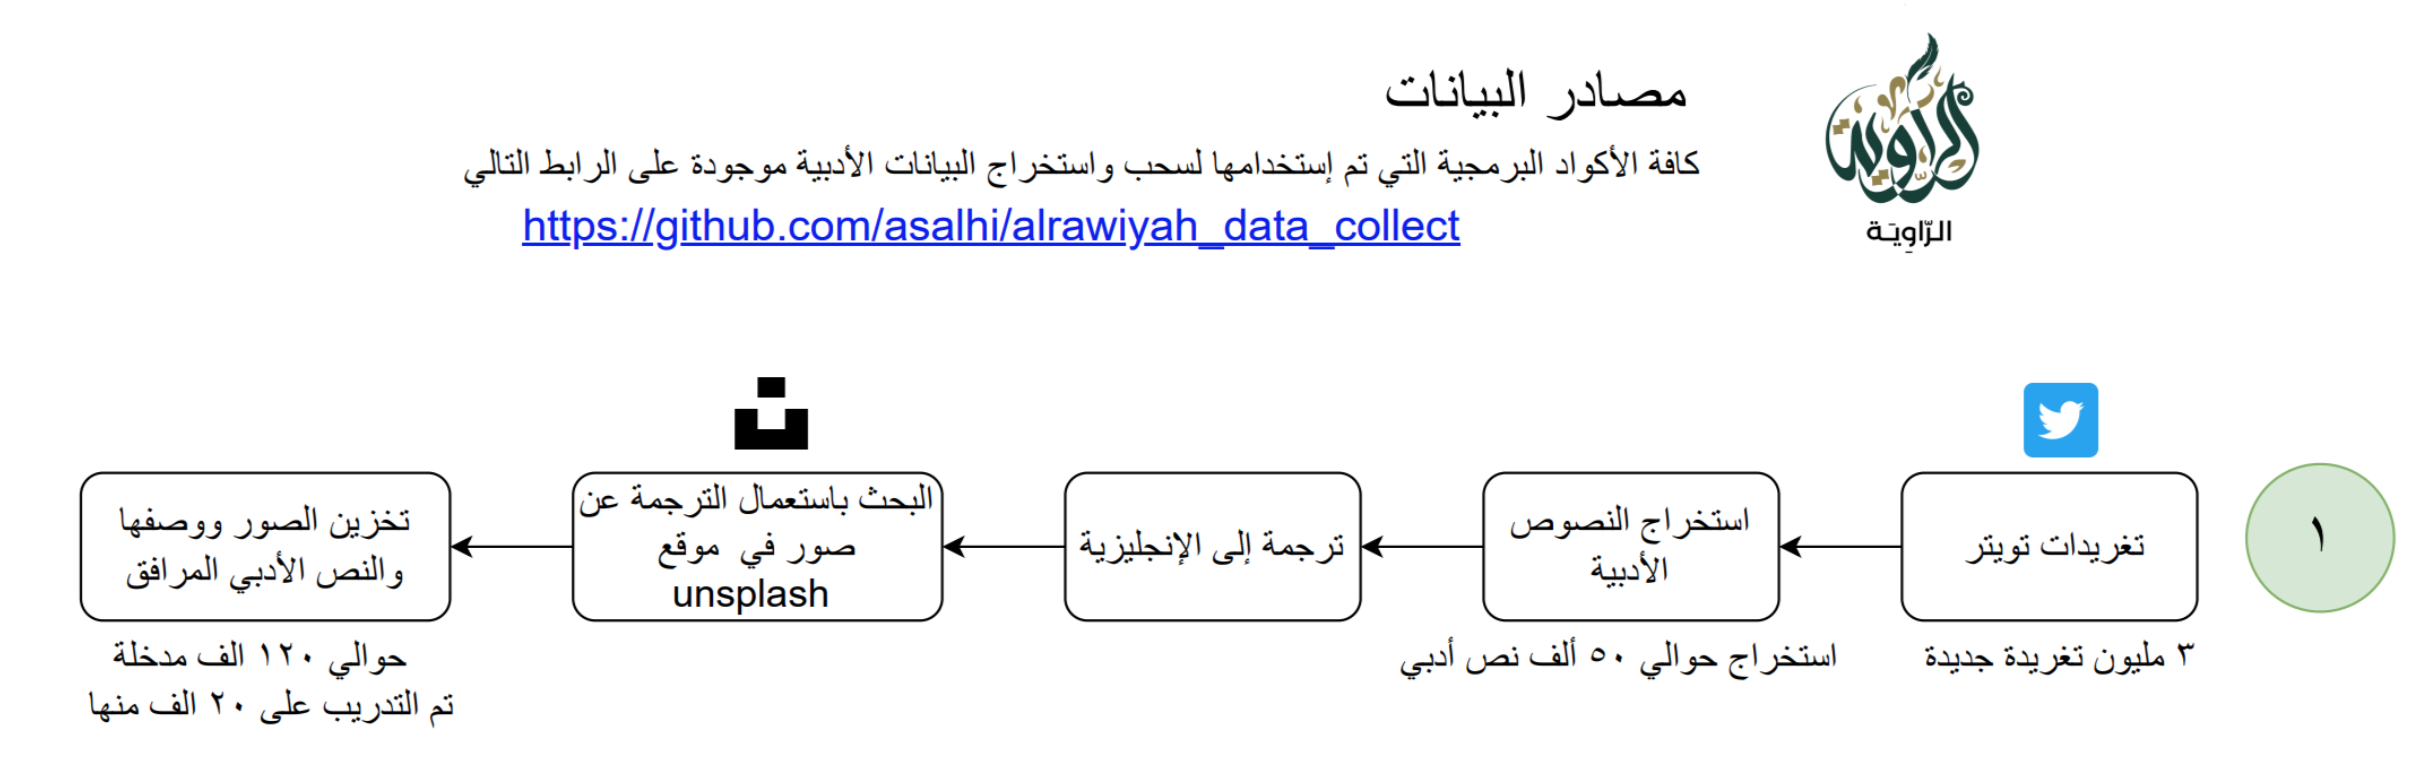


In [1]:
 !git clone https://github.com/asalhi/alrawiyah_data_collect/

Cloning into 'alrawiyah_data_collect'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 56 (delta 9), reused 52 (delta 8), pack-reused 0
Unpacking objects: 100% (56/56), done.


الكود المستعمل لسحب الداتا من تويتر - تم تعليبه في البايثون ليتمكن اي شخص من تشغيله من الويب
النسخة الأصليه هي بالجافا

In [2]:
from subprocess import *
import json
import os

def jarWrapper(*args):
    process = Popen(['java', '-jar']+list(args), stdout=PIPE, stderr=PIPE, encoding='UTF-8')
    ret = []
    while process.poll() is None:
        line = process.stdout.readline()
        if line != '' and line.endswith('\n'):
            ret.append(line[:-1])
            print(line[:-1])
    stdout, stderr = process.communicate()
    ret += stdout.split('\n')
    if stderr != '':
        ret += stderr.split('\n')
    ret.remove('')
    return ret

يتم الاعتماد على :
Twitter API 1.1

يجب إدخال معلومات التالية حتى يعمل البرنامج

In [3]:
consumer_key = "<add consumer key from twitter dev api>";
consumer_secret = "<add consumer secret>";	
access_token = "<add access token>";
access_token_secret = "<add token secrt>";

**الخطوة الأولى** 

سحب تغريدات من تويتر

In [4]:

save_folder = "/content/tweets"
os.mkdir(save_folder)

limit = 1000

args = ['/content/alrawiyah_data_collect/jars/alrawiyah_tweets_collecter.jar', consumer_key, consumer_secret,
        access_token, access_token_secret, str(limit), save_folder ]
jarWrapper(*args)

# تستطيع ايقاف الكود يدويا عندما تكتفي في عدد التغريدات المستخرج

[Sat May 28 07:55:54 UTC 2022]Establishing connection.
[Sat May 28 07:55:55 UTC 2022]Connection established.
[Sat May 28 07:55:55 UTC 2022]Receiving status stream.
[Alrawiyah - ArabicTweetsCollecter - Split by: 1000]: Saving to file:/content/tweets/1653724554311
[Alrawiyah - ArabicTweetsCollecter - Split by: 1000]: Saving to file:/content/tweets/1653724597564 Size Counter = :1
[Alrawiyah - ArabicTweetsCollecter - Split by: 1000]: Saving to file:/content/tweets/1653724638217 Size Counter = :2
[Alrawiyah - ArabicTweetsCollecter - Split by: 1000]: Saving to file:/content/tweets/1653724677790 Size Counter = :3
[Alrawiyah - ArabicTweetsCollecter - Split by: 1000]: Saving to file:/content/tweets/1653724717529 Size Counter = :4
[Alrawiyah - ArabicTweetsCollecter - Split by: 1000]: Saving to file:/content/tweets/1653724758345 Size Counter = :5


KeyboardInterrupt: ignored

**الخطوة الثانية **

استخراج النصوص الأدبيةوالدينية من التغريدات

In [5]:
args = ['/content/alrawiyah_data_collect/jars/alrawiyah_tweets_literary_extracter.jar', "/content/tweets/",
        "literary_tweets.csv","log.txt"]
jarWrapper(*args)


Starting ...
Reading Files ... 
/content/tweets/1653724597564.txt
/content/tweets/1653724638217.txt
/content/tweets/1653724717529.txt
/content/tweets/1653724677790.txt
/content/tweets/1653724554311.txt
/content/tweets/1653724758345.txt
Phase two done
Number of Quotes: 261
Number of Tweets: 5296
Number of Missed Tweets: 0


['Starting ...',
 'Reading Files ... ',
 '/content/tweets/1653724597564.txt',
 '/content/tweets/1653724638217.txt',
 '/content/tweets/1653724717529.txt',
 '/content/tweets/1653724677790.txt',
 '/content/tweets/1653724554311.txt',
 '/content/tweets/1653724758345.txt',
 'Phase two done',
 'Number of Quotes: 261',
 'Number of Tweets: 5296',
 'Number of Missed Tweets: 0']

In [6]:
import pandas as pd
df = pd.read_csv("/content/literary_tweets.csv", sep=',', error_bad_lines=False)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,tweet,interaction,url
0,و يبقى وجودكَ مُطمئِنٌ ليِ ... حَتى لو كَان بَ...,47,https://twitter.com/yW8HQiAhOFOR5UT/status/152...
1,لمْ يتعبِ العاشقونَ مِنَ العُروجْ، والغايةُ ال...,13,https://twitter.com/Riiatu/status/153028889011...
2,إِذْ قَالَ رَبُّكَ لِلْمَلَائِكَةِ إِنِّي جَاع...,9,https://twitter.com/fark13tc6jshaf/status/1530...
3,ما تَوَطَّنَ رجلٌ مسلمٌ المساجِدَ للصلاةِ والذ...,17,https://twitter.com/albahli1966/status/1530455...
4,دنا من الزهرةِ القمرْ هل طاب بينهُماالسّمر رأَ...,1,https://twitter.com/abo_adel2012/status/153045...
...,...,...,...
256,ابعد عن عاطفتك المفرطة ... توقف عن كثرة العتاب...,10,https://twitter.com/shosh78826449/status/15304...
257,اللهُمَّ صبَّ علي من رحمتك ما يُرضي خاطري، ومن...,3800,https://twitter.com/_mzdanh/status/15301953818...
258,ذبَح فرعون آلاف الأطفال كي لا يأتِيَ موسى عليه...,58,https://twitter.com/AlQamzi_Dubai/status/15301...
259,٢ رمضان 🌙🗓️ قال الغزالي: إن الله إذا أحبّ عبدً...,39,https://twitter.com/kayan115/status/1510719496...


**الخطوة الثالثة**

التحضير لترجمة النصوص المستخرجه والبحث على موقع الصور لربطها في صور

In [7]:
!pip install deep-translator
!pip install flair
!pip install keyphrase-vectorizers
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 8.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 44.6 MB/s 
     |████████████████████████████████| 19.7 MB 9.4 MB/s 
     |████████████████████████████████| 46 kB 2.9 MB/s 
     |████████████████████████████████| 788 kB 62.8 MB/s 
     |████████████████████████████████| 1.6 MB 47.5 MB/s 
     |████████████████████████████████| 981 kB 54.5 MB/s 
     |████████████████████████████████| 86 kB 4.1 MB/s 
     |████████████████████████████████| 4.2 MB 29.3 MB/s 
     |████████████████████████████████| 53 k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from flair.embeddings import TransformerDocumentEmbeddings
from deep_translator import GoogleTranslator
import pandas as pd
import requests
import urllib.request
import numpy as np
import IPython
from IPython.core.display import Image, display


In [9]:
def translate(text, in_lang='auto', out_lang='en'):
  translated = GoogleTranslator(source=in_lang, target=out_lang).translate(text)
  return translated

def extract_keywords(text, model):
  try:
    res = model.extract_keywords(docs=[text], vectorizer=KeyphraseCountVectorizer())
  except:
    return ""
  return res

def struct_keywords(keywords):
  df_keys = pd.DataFrame(columns=('phrase', 'score'))
  for i in range(0, len(keywords[0])):
    df_keys.loc[i] = [keywords[0][i][0], keywords[0][i][1]]
  df_keys = df_keys.sort_values(by=['score'], ascending=False)
  df_keys = df_keys.reset_index()
  return df_keys

def keywords_to_str(keywords):
  tt = ""
  for i in range(0, len(keywords[0])):
    tt = tt + keywords[0][i][0] +" " 
  return tt.strip()
#full_df = pd.DataFrame(columns=('id','tweet', 'tweet_en', 'interaction', 'desc','desc_ar','thumb','full', 'tweet_url'))


def parse_unsplash_json_full(j_response, text, text_en, text_url, interaction, search_query):
   df = pd.DataFrame(columns=('id','tweet', 'tweet_en', 'search_query', 'interaction', 'desc','desc_ar','thumb','full', 'tweet_url'))

   for res in j_response:
     id = res['id']
     desc = res['alt_description']
     #print(desc)
     if desc is None:
       desc_ar = ''
     else:
       desc_ar = translate(desc, out_lang="ar")
     thumb = res['urls']['small_s3']
     full = res['links']['download']
     df.loc[len(df.index)] = [id,text, text_en, search_query, interaction, desc,desc_ar,thumb,full, text_url]
   return df

def parse_unsplash_json_full2(j_response, text, text_en, search_query):
   df = pd.DataFrame(columns=('id','text', 'text_en', 'search_query', 'desc','desc_ar','thumb','full'))

   for res in j_response:
     id = res['id']
     desc = res['alt_description']
     #print(desc)
     if desc is None:
       desc_ar = ''
     else:
       desc_ar = translate(desc, out_lang="ar")
     thumb = res['urls']['small_s3']
     full = res['links']['download']
     df.loc[len(df.index)] = [id,text, text_en, search_query, desc,desc_ar,thumb,full]
   return df

def parse_unsplash_json(j_response, text):
   df = pd.DataFrame(columns=('id','text', 'desc','desc_ar','thumb','full'))

   for res in j_response:
     id = res['id']
     desc = res['alt_description']
     #print(desc)
     if desc is None:
       desc_ar = ''
     else:
       desc_ar = translate(desc, out_lang="ar")
     thumb = res['urls']['small_s3']
     full = res['links']['download']
     df.loc[len(df.index)] = [id,text, desc,desc_ar,thumb,full]
   return df


In [10]:
tweets = pd.read_csv("/content/literary_tweets.csv", sep=",")

tweets

,tweet,interaction,url
0,و يبقى وجودكَ مُطمئِنٌ ليِ ... حَتى لو كَان بَ...,47,https://twitter.com/yW8HQiAhOFOR5UT/status/152...
1,لمْ يتعبِ العاشقونَ مِنَ العُروجْ، والغايةُ ال...,13,https://twitter.com/Riiatu/status/153028889011...
2,إِذْ قَالَ رَبُّكَ لِلْمَلَائِكَةِ إِنِّي جَاع...,9,https://twitter.com/fark13tc6jshaf/status/1530...
3,ما تَوَطَّنَ رجلٌ مسلمٌ المساجِدَ للصلاةِ والذ...,17,https://twitter.com/albahli1966/status/1530455...
4,دنا من الزهرةِ القمرْ هل طاب بينهُماالسّمر رأَ...,1,https://twitter.com/abo_adel2012/status/153045...
...,...,...,...
256,ابعد عن عاطفتك المفرطة ... توقف عن كثرة العتاب...,10,https://twitter.com/shosh78826449/status/15304...
257,اللهُمَّ صبَّ علي من رحمتك ما يُرضي خاطري، ومن...,3800,https://twitter.com/_mzdanh/status/15301953818...
258,ذبَح فرعون آلاف الأطفال كي لا يأتِيَ موسى عليه...,58,https://twitter.com/AlQamzi_Dubai/status/15301...
259,٢ رمضان 🌙🗓️ قال الغزالي: إن الله إذا أحبّ عبدً...,39,https://twitter.com/kayan115/status/1510719496...


ترجمة التغريدات

In [11]:
tweets['tweet_en'] = tweets['tweet'].apply(lambda x:   translate(str(x)))
tweets

,tweet,interaction,url,tweet_en
0,و يبقى وجودكَ مُطمئِنٌ ليِ ... حَتى لو كَان بَ...,47,https://twitter.com/yW8HQiAhOFOR5UT/status/152...,And your presence remains reassuring for me......
1,لمْ يتعبِ العاشقونَ مِنَ العُروجْ، والغايةُ ال...,13,https://twitter.com/Riiatu/status/153028889011...,"Lovers never tire of laziness, and the goal is..."
2,إِذْ قَالَ رَبُّكَ لِلْمَلَائِكَةِ إِنِّي جَاع...,9,https://twitter.com/fark13tc6jshaf/status/1530...,"When your Lord said to the angels, I am appoin..."
3,ما تَوَطَّنَ رجلٌ مسلمٌ المساجِدَ للصلاةِ والذ...,17,https://twitter.com/albahli1966/status/1530455...,A Muslim man does not settle in mosques for pr...
4,دنا من الزهرةِ القمرْ هل طاب بينهُماالسّمر رأَ...,1,https://twitter.com/abo_adel2012/status/153045...,"Closer than Venus to the moon, did the two of ..."
...,...,...,...,...
256,ابعد عن عاطفتك المفرطة ... توقف عن كثرة العتاب...,10,https://twitter.com/shosh78826449/status/15304...,Stay away from your excessive emotion... Stop ...
257,اللهُمَّ صبَّ علي من رحمتك ما يُرضي خاطري، ومن...,3800,https://twitter.com/_mzdanh/status/15301953818...,"O Allah, pour out on me from Your mercy that w..."
258,ذبَح فرعون آلاف الأطفال كي لا يأتِيَ موسى عليه...,58,https://twitter.com/AlQamzi_Dubai/status/15301...,Pharaoh slaughtered thousands of children so t...
259,٢ رمضان 🌙🗓️ قال الغزالي: إن الله إذا أحبّ عبدً...,39,https://twitter.com/kayan115/status/1510719496...,Ramadan 2 🌙🗓️ Al-Ghazali said: If God loves a ...


**الخطوة الرابعة **

تنظيف التغريدات و فصل النصوص الدينية

In [13]:
!pip install pyarabic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 5.4 MB/s 


In [14]:
import re
import numpy as np
import pandas as pd
import pyarabic.araby as ar
import string
def preproess_tweet (text):

  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  text = re.sub(r'^http?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  # text = text.replace("السلام عليكم", "");
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r"https\S+", "", text)
  text = re.sub(r'\s+', ' ', text)
  text = re.sub("(\s\d+)","",text) 
  text = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", text)
  text = re.sub("\d+", " ", text)
  text = re.sub("@[A-Za-z0-9_]+","", text)
  text = re.sub("#[A-Za-z0-9_]+","", text)
  #text = ar.strip_tashkeel(text)
  text = ar.strip_tatweel(text)
  text = text.replace("#", " ");
  text = text.replace("@", " ");
  text = text.replace("_", " ");
  translator = str.maketrans('', '', string.punctuation)
  text = text.translate(translator)


  return text


def remove_rel_tweets (text):
  text = ar.strip_tashkeel(text)
  text = text.replace("«","")

  rels =[]
  rels.append("ﷺ")
  rels.append("رسول الله")
  rels.append("اللهم")
  rels.append("أعوذ")
  rels.append("ﷺ")
  rels.append("قال")
  rels.append("إلهي")
  rels.append("النبي")
  rels.append("القرآن")
  rels.append("صلى الله عليه وسلم")
  rels.append("بن")
  rels.append("أستغفر")
  rels.append("سبحان الله")
  rels.append("لا حول ولا")
  rels.append("لا إله إلا الله")
  rels.append("لا اله الا الله")
  rels.append("الهم")
  rels.append("قوله تعالى")
  rels.append("قال تعالى")
  rels.append("سبحانك")
  rels.append("فسبحانه")
  rels.append("الظالمين")
  rels.append("تعالى")
  rels.append("اله")
  rels.append("اللہم")
  rels.append("ربنا اغفر")
  rels.append("ربنا")
  rels.append("رحمه الله")
  rels.append("رحمه اللّہ")
  #rels.append("اله")
  
  ins = text.split(" ")
  intersection = [value for value in rels if value in ins]
  if len(intersection) > 0:
    text = "del"

  


  return text


In [16]:
tweets['tweet_rel'] = tweets['tweet'].apply(lambda x:   preproess_tweet(str(x)))
tweets['tweet_rel'] = tweets['tweet'].apply(lambda x:   remove_rel_tweets(str(x)))
tweets[tweets['tweet_rel']!= 'del']

,tweet,interaction,url,tweet_en,tweet_rel
0,و يبقى وجودكَ مُطمئِنٌ ليِ ... حَتى لو كَان بَ...,47,https://twitter.com/yW8HQiAhOFOR5UT/status/152...,And your presence remains reassuring for me......,و يبقى وجودك مطمئن لي ... حتى لو كان بيني و بي...
1,لمْ يتعبِ العاشقونَ مِنَ العُروجْ، والغايةُ ال...,13,https://twitter.com/Riiatu/status/153028889011...,"Lovers never tire of laziness, and the goal is...",لم يتعب العاشقون من العروج، والغاية الارتقاء ن...
3,ما تَوَطَّنَ رجلٌ مسلمٌ المساجِدَ للصلاةِ والذ...,17,https://twitter.com/albahli1966/status/1530455...,A Muslim man does not settle in mosques for pr...,ما توطن رجل مسلم المساجد للصلاة والذكر إلا تبش...
4,دنا من الزهرةِ القمرْ هل طاب بينهُماالسّمر رأَ...,1,https://twitter.com/abo_adel2012/status/153045...,"Closer than Venus to the moon, did the two of ...",دنا من الزهرة القمر هل طاب بينهماالسمر رأيابذا...
5,{ لَن تُغْنِيَ عَنْهُمْ أَمْوَالُهُمْ وَلَا أَ...,15,https://twitter.com/Yaqoub_Yousif_/status/1530...,{Neither their wealth nor their children will ...,{ لن تغني عنهم أموالهم ولا أولادهم من الله شيئ...
...,...,...,...,...,...
250,يَا مَنْ تُحبُّونَ الرسولَ محمدًا صلُّوا على خ...,37,https://twitter.com/ilcii__11/status/153011344...,"O you who love the Messenger Muhammad, peace a...",يا من تحبون الرسول محمدا صلوا على خير الأنام و...
252,الى كلِّ زوج زوجتُك هي زهرة منزلِك ، إذا رأيته...,37,https://twitter.com/adilsaadie/status/15304148...,"To every husband, your wife is the flower of y...",الى كل زوج زوجتك هي زهرة منزلك ، إذا رأيتها يو...
253,تقيم المرجعيّة العليا مجلساً في ذكرى استشهاد ا...,8,https://twitter.com/ahm_algreshe/status/153043...,The Supreme Marja’iya holds a council in memor...,تقيم المرجعية العليا مجلسا في ذكرى استشهاد الإ...
256,ابعد عن عاطفتك المفرطة ... توقف عن كثرة العتاب...,10,https://twitter.com/shosh78826449/status/15304...,Stay away from your excessive emotion... Stop ...,ابعد عن عاطفتك المفرطة ... توقف عن كثرة العتاب...


In [17]:
tweets2 = tweets[tweets['tweet_rel']!= 'del']
tweets2

,tweet,interaction,url,tweet_en,tweet_rel
0,و يبقى وجودكَ مُطمئِنٌ ليِ ... حَتى لو كَان بَ...,47,https://twitter.com/yW8HQiAhOFOR5UT/status/152...,And your presence remains reassuring for me......,و يبقى وجودك مطمئن لي ... حتى لو كان بيني و بي...
1,لمْ يتعبِ العاشقونَ مِنَ العُروجْ، والغايةُ ال...,13,https://twitter.com/Riiatu/status/153028889011...,"Lovers never tire of laziness, and the goal is...",لم يتعب العاشقون من العروج، والغاية الارتقاء ن...
3,ما تَوَطَّنَ رجلٌ مسلمٌ المساجِدَ للصلاةِ والذ...,17,https://twitter.com/albahli1966/status/1530455...,A Muslim man does not settle in mosques for pr...,ما توطن رجل مسلم المساجد للصلاة والذكر إلا تبش...
4,دنا من الزهرةِ القمرْ هل طاب بينهُماالسّمر رأَ...,1,https://twitter.com/abo_adel2012/status/153045...,"Closer than Venus to the moon, did the two of ...",دنا من الزهرة القمر هل طاب بينهماالسمر رأيابذا...
5,{ لَن تُغْنِيَ عَنْهُمْ أَمْوَالُهُمْ وَلَا أَ...,15,https://twitter.com/Yaqoub_Yousif_/status/1530...,{Neither their wealth nor their children will ...,{ لن تغني عنهم أموالهم ولا أولادهم من الله شيئ...
...,...,...,...,...,...
250,يَا مَنْ تُحبُّونَ الرسولَ محمدًا صلُّوا على خ...,37,https://twitter.com/ilcii__11/status/153011344...,"O you who love the Messenger Muhammad, peace a...",يا من تحبون الرسول محمدا صلوا على خير الأنام و...
252,الى كلِّ زوج زوجتُك هي زهرة منزلِك ، إذا رأيته...,37,https://twitter.com/adilsaadie/status/15304148...,"To every husband, your wife is the flower of y...",الى كل زوج زوجتك هي زهرة منزلك ، إذا رأيتها يو...
253,تقيم المرجعيّة العليا مجلساً في ذكرى استشهاد ا...,8,https://twitter.com/ahm_algreshe/status/153043...,The Supreme Marja’iya holds a council in memor...,تقيم المرجعية العليا مجلسا في ذكرى استشهاد الإ...
256,ابعد عن عاطفتك المفرطة ... توقف عن كثرة العتاب...,10,https://twitter.com/shosh78826449/status/15304...,Stay away from your excessive emotion... Stop ...,ابعد عن عاطفتك المفرطة ... توقف عن كثرة العتاب...


In [18]:
tweets2 = tweets2.drop('tweet_rel', 1)
tweets2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,tweet,interaction,url,tweet_en
0,و يبقى وجودكَ مُطمئِنٌ ليِ ... حَتى لو كَان بَ...,47,https://twitter.com/yW8HQiAhOFOR5UT/status/152...,And your presence remains reassuring for me......
1,لمْ يتعبِ العاشقونَ مِنَ العُروجْ، والغايةُ ال...,13,https://twitter.com/Riiatu/status/153028889011...,"Lovers never tire of laziness, and the goal is..."
3,ما تَوَطَّنَ رجلٌ مسلمٌ المساجِدَ للصلاةِ والذ...,17,https://twitter.com/albahli1966/status/1530455...,A Muslim man does not settle in mosques for pr...
4,دنا من الزهرةِ القمرْ هل طاب بينهُماالسّمر رأَ...,1,https://twitter.com/abo_adel2012/status/153045...,"Closer than Venus to the moon, did the two of ..."
5,{ لَن تُغْنِيَ عَنْهُمْ أَمْوَالُهُمْ وَلَا أَ...,15,https://twitter.com/Yaqoub_Yousif_/status/1530...,{Neither their wealth nor their children will ...
...,...,...,...,...
250,يَا مَنْ تُحبُّونَ الرسولَ محمدًا صلُّوا على خ...,37,https://twitter.com/ilcii__11/status/153011344...,"O you who love the Messenger Muhammad, peace a..."
252,الى كلِّ زوج زوجتُك هي زهرة منزلِك ، إذا رأيته...,37,https://twitter.com/adilsaadie/status/15304148...,"To every husband, your wife is the flower of y..."
253,تقيم المرجعيّة العليا مجلساً في ذكرى استشهاد ا...,8,https://twitter.com/ahm_algreshe/status/153043...,The Supreme Marja’iya holds a council in memor...
256,ابعد عن عاطفتك المفرطة ... توقف عن كثرة العتاب...,10,https://twitter.com/shosh78826449/status/15304...,Stay away from your excessive emotion... Stop ...


**الخطوة الخامسة **

سحب صور ذات علاقة من unsplash

In [19]:
!pip install yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 3.0 MB/s 
     |████████████████████████████████| 132 kB 13.3 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73987 sha256=e1247ab1feba8db16ce23efbf86fd1f890d41c2398cc8aaa40e17bd3f6131056
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [21]:
# اذا رغبنا بالبحث باستعمال الكلمات المفتاحية
def yake_keywords(text):
  language = "en"
  max_ngram_size = 3
  deduplication_threshold = 0.9
  numOfKeywords = 20
  custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
  keywords = custom_kw_extractor.extract_keywords(text)
  sen = ""
  for kw in keywords:
    sen = sen +kw[0]+"+" 
  sen = sen[:-1]
  return sen


In [23]:
import time
count = 0
finish = 100
df_full = pd.DataFrame(columns=('id','tweet', 'tweet_en', 'search_query', 'interaction', 'desc','desc_ar','thumb','full', 'tweet_url'))
#df_full = pd.DataFrame(columns=('id','text', 'text_en', 'search_query', 'desc','desc_ar','thumb','full'))

for index, row in tweets2.iterrows():
  
  text_en = row['tweet_en']
  text = row['tweet']
  text_url = row['url']
  interaction = row['interaction']
  # keywords = extract_keywords(text_en, kw_model)
  # try:
  #   df_keys = keywords_to_str(keywords)
  # except: 
  #   df_keys = ""

  # df_keys = ""
  # try:
  #   df_keys = yake_keywords(text_en)
  # except:
  #   df_keys = ""

  base_url = "https://unsplash.com/napi/search?&per_page=5&query="

  query = text_en.replace(" ","-")
  
  response = requests.get(base_url+query)
  print(response)
  print(base_url+query)
  if not "errors" in response.json():
    df = parse_unsplash_json_full(response.json()['photos']['results'], text, text_en, text_url, interaction, query) #,df_keys)
      #def parse_unsplash_json_full(j_response, text, text_en, text_url, interaction, search_query):

    df_full=df_full.append(df, ignore_index=True)


  print(count)
  count = count + 1
  
display(df_full)

<Response [200]>
https://unsplash.com/napi/search?&per_page=5&query=And-your-presence-remains-reassuring-for-me...even-if-there-are-cities,-distances,-people,-and-silence-between-you-and-me....-I-wish-you...-you-would-tell-me-where-to-find-the-well-of-wishes.-.....
0
<Response [200]>
https://unsplash.com/napi/search?&per_page=5&query=Lovers-never-tire-of-laziness,-and-the-goal-is-to-ascend-towards-immortality,-and-all-the-battlefields-of-jihad-are-open,-and-the-path-to-victory-is-open.
1
<Response [200]>
https://unsplash.com/napi/search?&per_page=5&query=A-Muslim-man-does-not-settle-in-mosques-for-prayer-and-remembrance-but-that-God-does-not-pray-for-him-when-he-leaves-his-house,-as-the-people-of-the-absent-join-them-in-prayer.
2
<Response [200]>
https://unsplash.com/napi/search?&per_page=5&query=Closer-than-Venus-to-the-moon,-did-the-two-of-them-feel-good,-then-did-they-get-close,-or-is-it-after-looking-at-the-meeting-of-wisdom-in-which-they-perceive-danger,-or-is-it-an-old-love-that-

,id,tweet,tweet_en,search_query,interaction,desc,desc_ar,thumb,full,tweet_url
0,nF8xhLMmg0c,و يبقى وجودكَ مُطمئِنٌ ليِ ... حَتى لو كَان بَ...,And your presence remains reassuring for me......,And-your-presence-remains-reassuring-for-me......,47,people laughing and talking outside during day...,الناس يضحكون ويتحدثون في الخارج أثناء النهار,https://s3.us-west-2.amazonaws.com/images.unsp...,https://unsplash.com/photos/nF8xhLMmg0c/downlo...,https://twitter.com/yW8HQiAhOFOR5UT/status/152...
1,LyeduBb2Auk,و يبقى وجودكَ مُطمئِنٌ ليِ ... حَتى لو كَان بَ...,And your presence remains reassuring for me......,And-your-presence-remains-reassuring-for-me......,47,woman blonde hair and red lipstick,المرأة، الشعر الأشقر، أيضا، أحمر الشفاه,https://s3.us-west-2.amazonaws.com/images.unsp...,https://unsplash.com/photos/LyeduBb2Auk/downlo...,https://twitter.com/yW8HQiAhOFOR5UT/status/152...
2,rDEOVtE7vOs,و يبقى وجودكَ مُطمئِنٌ ليِ ... حَتى لو كَان بَ...,And your presence remains reassuring for me......,And-your-presence-remains-reassuring-for-me......,47,shallow focus photography of woman outdoor dur...,التصوير بالتركيز الضحل للمرأة في الهواء الطلق ...,https://s3.us-west-2.amazonaws.com/images.unsp...,https://unsplash.com/photos/rDEOVtE7vOs/downlo...,https://twitter.com/yW8HQiAhOFOR5UT/status/152...
3,NoRsyXmHGpI,و يبقى وجودكَ مُطمئِنٌ ليِ ... حَتى لو كَان بَ...,And your presence remains reassuring for me......,And-your-presence-remains-reassuring-for-me......,47,woman sitting in front of brown wooden table,امرأة تجلس أمام طاولة خشبية بنية اللون,https://s3.us-west-2.amazonaws.com/images.unsp...,https://unsplash.com/photos/NoRsyXmHGpI/downlo...,https://twitter.com/yW8HQiAhOFOR5UT/status/152...
4,mEZ3PoFGs_k,و يبقى وجودكَ مُطمئِنٌ ليِ ... حَتى لو كَان بَ...,And your presence remains reassuring for me......,And-your-presence-remains-reassuring-for-me......,47,closeup photography of woman smiling,التصوير المقربة لامرأة تبتسم,https://s3.us-west-2.amazonaws.com/images.unsp...,https://unsplash.com/photos/mEZ3PoFGs_k/downlo...,https://twitter.com/yW8HQiAhOFOR5UT/status/152...
...,...,...,...,...,...,...,...,...,...,...
800,hfv2GImBsfM,ذبَح فرعون آلاف الأطفال كي لا يأتِيَ موسى عليه...,Pharaoh slaughtered thousands of children so t...,Pharaoh-slaughtered-thousands-of-children-so-t...,58,peace sign,علامة السلام,https://s3.us-west-2.amazonaws.com/images.unsp...,https://unsplash.com/photos/hfv2GImBsfM/downlo...,https://twitter.com/AlQamzi_Dubai/status/15301...
801,2Lp0HWUxsbw,ذبَح فرعون آلاف الأطفال كي لا يأتِيَ موسى عليه...,Pharaoh slaughtered thousands of children so t...,Pharaoh-slaughtered-thousands-of-children-so-t...,58,woman near yellow neon sign,امرأة بالقرب من علامة النيون الصفراء,https://s3.us-west-2.amazonaws.com/images.unsp...,https://unsplash.com/photos/2Lp0HWUxsbw/downlo...,https://twitter.com/AlQamzi_Dubai/status/15301...
802,8KLyk4dAYTM,ذبَح فرعون آلاف الأطفال كي لا يأتِيَ موسى عليه...,Pharaoh slaughtered thousands of children so t...,Pharaoh-slaughtered-thousands-of-children-so-t...,58,blue and white boat on water near houses durin...,القارب الأزرق والأبيض على الماء بالقرب من المن...,https://s3.us-west-2.amazonaws.com/images.unsp...,https://unsplash.com/photos/8KLyk4dAYTM/downlo...,https://twitter.com/AlQamzi_Dubai/status/15301...
803,0P04BAkcZjs,ذبَح فرعون آلاف الأطفال كي لا يأتِيَ موسى عليه...,Pharaoh slaughtered thousands of children so t...,Pharaoh-slaughtered-thousands-of-children-so-t...,58,pink flower in tilt shift lens,زهرة وردية في عدسة تحول الميل,https://s3.us-west-2.amazonaws.com/images.unsp...,https://unsplash.com/photos/0P04BAkcZjs/downlo...,https://twitter.com/AlQamzi_Dubai/status/15301...


In [24]:
df_full.to_csv('/content/tweets_train.csv', index=False)